In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
info_original = pd.read_csv("data/userInfo_forGary_20190918.csv")

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,35,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
# without title, idDetected
info_select = info_original[['userId', 'experience', 'education', 'age', 'bikeSurvey', 'drivingLicenseSurvey', 'married', 'city','source']]

In [58]:
info_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18839 entries, 0 to 18838
Data columns (total 9 columns):
userId                  18839 non-null object
experience              7417 non-null object
education               7489 non-null object
age                     18826 non-null float64
bikeSurvey              17625 non-null object
drivingLicenseSurvey    14475 non-null object
married                 7246 non-null object
city                    18839 non-null object
source                  18836 non-null object
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


### city

In [59]:
# Decrease classes in city column
target = ['Ahmedabad', 'Delhi/NCR', 'Bangalore', 'your city']
info_select.loc[~(info_select['city'].isin(target)), 'city'] = 'others'

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [60]:
info_select['city'].value_counts()

others       7990
Ahmedabad    4481
Delhi/NCR    3370
your city    1773
Bangalore    1225
Name: city, dtype: int64

### experience

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

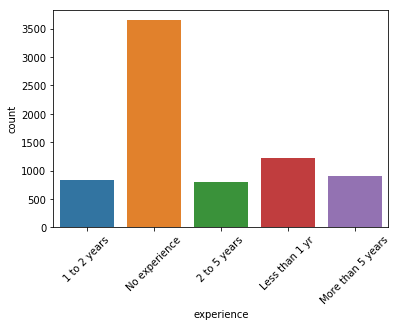

In [61]:
sns.countplot(x='experience', data=info_select)
plt.xticks(rotation=45)

In [62]:
# Fill up miss values in experience column
info_select.loc[:, 'experience'] = info_select.loc[:,'experience'].fillna('not provided')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

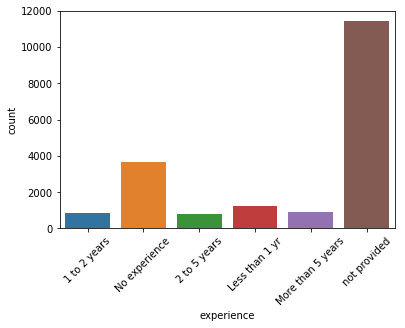

In [63]:
sns.countplot(x='experience', data=info_select)
plt.xticks(rotation=45)

### education

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

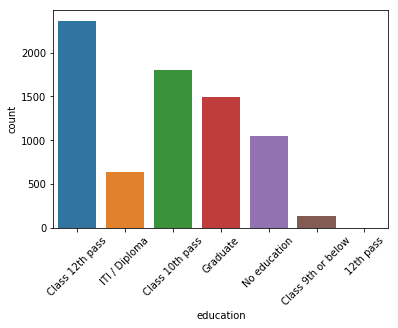

In [64]:
sns.countplot(x='education', data=info_select)
plt.xticks(rotation=45)

In [67]:
info_select.loc[:, 'education'] = info_select.loc[:,'education'].fillna('not provided')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

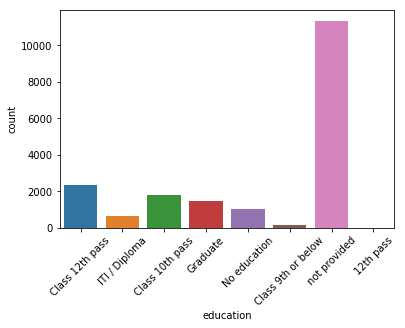

In [68]:
sns.countplot(x='education', data=info_select)
plt.xticks(rotation=45)

### age

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]), <a list of 92 Text xticklabel objects>)

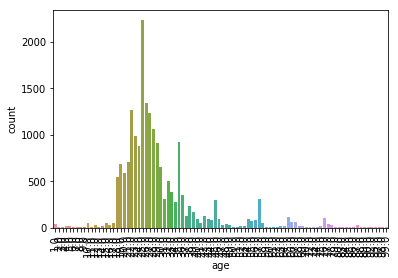

In [69]:
sns.countplot(x='age', data=info_select)
plt.xticks(rotation=90)

In [72]:
from sklearn.preprocessing import Imputer
# change it to "from sklearn import impute.SimpleImputer" after 0.22 version

imr = Imputer(missing_values='NaN', strategy='median', axis=0)

info_select.loc[:,'age'] = imr.fit_transform(info_select[['age']]).ravel()

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [73]:
info_select.loc[:,'age'].isnull().sum()

0

### bike survey

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

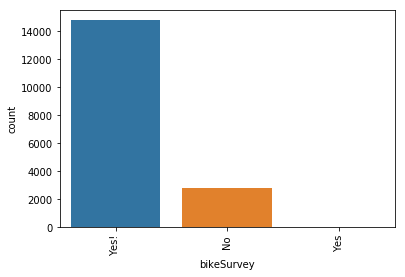

In [74]:
sns.countplot(x='bikeSurvey', data=info_select)
plt.xticks(rotation=90)

In [75]:
info_select.loc[:, 'bikeSurvey'] = info_select.loc[:, 'bikeSurvey'].str.replace("!","")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

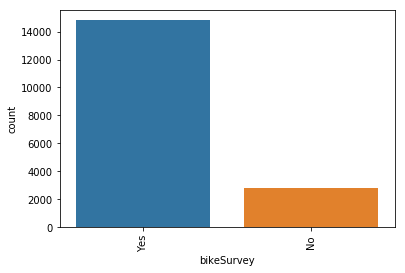

In [76]:
sns.countplot(x='bikeSurvey', data=info_select)
plt.xticks(rotation=90)

In [77]:
info_select.loc[:, 'bikeSurvey'] = info_select.loc[:,'bikeSurvey'].fillna('not provided')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

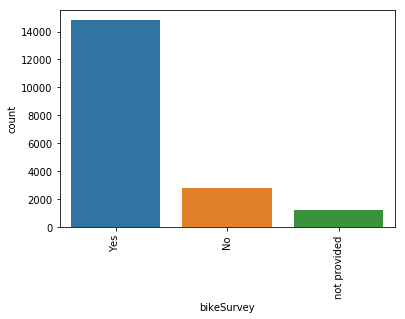

In [78]:
sns.countplot(x='bikeSurvey', data=info_select)
plt.xticks(rotation=90)

### DL 

In [79]:
info_select.loc[:, 'drivingLicenseSurvey'].fillna('not provided', inplace=True)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [80]:
info_select.loc[:, 'drivingLicenseSurvey'] = info_select.loc[:, 'drivingLicenseSurvey'].str.replace("!","")

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

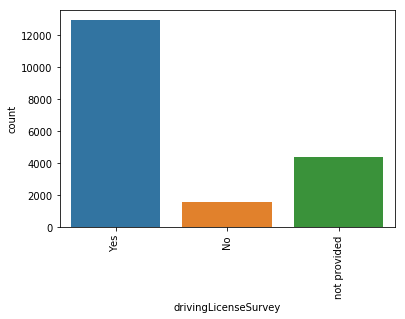

In [81]:
sns.countplot(x='drivingLicenseSurvey', data=info_select)
plt.xticks(rotation=90)

### married

(array([0, 1]), <a list of 2 Text xticklabel objects>)

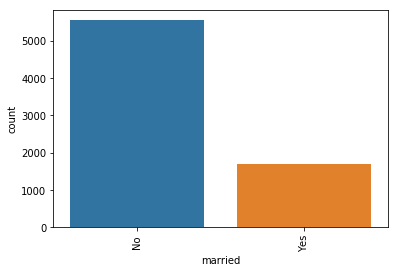

In [82]:
sns.countplot(x='married', data=info_select)
plt.xticks(rotation=90)

In [83]:
info_select.loc[:, 'married'].fillna('not provided', inplace=True)

### source

In [84]:
info_select.loc[:, 'source'].fillna('not provided', inplace=True)

In [85]:
target=['API', 'WhatsApp OptIn Form', 'Referrals', 'not provided']
info_select.loc[~(info_select['source'].isin(target)), 'source'] = 'others'

In [86]:
info_select.loc[:, 'source'].value_counts()

Referrals              12842
others                  4621
API                     1141
WhatsApp OptIn Form      232
not provided               3
Name: source, dtype: int64

### add label

In [98]:
info_select['label'] = 0

In [104]:
# label list is from "get label list by overlapped files"
info_select.loc[info_select['userId'].isin(label), 'label'] = 1

### FINAL CHECKING

In [105]:
info_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10534 entries, 0 to 18838
Data columns (total 10 columns):
userId                  10534 non-null object
experience              10534 non-null object
education               10534 non-null object
age                     10534 non-null float64
bikeSurvey              10534 non-null object
drivingLicenseSurvey    10534 non-null object
married                 10534 non-null object
city                    10534 non-null object
source                  10534 non-null object
label                   10534 non-null int64
dtypes: float64(1), int64(1), object(8)
memory usage: 905.3+ KB


In [106]:
info_select.head()

,userId,experience,education,age,bikeSurvey,drivingLicenseSurvey,married,city,source,label
0,6ca32c09-facf-457f-8e1a-bc0e7bce71e0,1 to 2 years,Class 12th pass,25.0,Yes,Yes,not provided,Delhi/NCR,API,0
2,06db6fbf-3f7c-4296-a408-3fa336e19c9c,No experience,Class 12th pass,20.0,Yes,Yes,No,Delhi/NCR,WhatsApp OptIn Form,0
3,4a6591cc-d34e-4d8c-8601-45fd5c6a24af,2 to 5 years,Class 12th pass,24.0,Yes,Yes,No,Delhi/NCR,WhatsApp OptIn Form,0
4,f7ce747a-6d6f-4d7f-845b-7fad148d146a,Less than 1 yr,ITI / Diploma,22.0,Yes,Yes,No,Delhi/NCR,API,0
5,fc9a0f5b-e655-469d-82ad-0a0200f58e98,1 to 2 years,Class 10th pass,19.0,Yes,Yes,No,Delhi/NCR,Referrals,0


In [91]:
# Make sure userId is unique
len(info_select.userId.unique())

10534

In [93]:
# remove duplicates by "userId"
info_select = info_select.loc[~info_select['userId'].duplicated()]

In [97]:
info_select.shape

(10534, 9)

In [138]:
info_select.label.value_counts()

0    10493
1       41
Name: label, dtype: int64

### get label list by overlapped files

In [100]:
hired = pd.read_csv("data/hiredData_forGary_20190918.csv")
message = pd.read_csv('data/user_messages_forGary_20190918.csv')

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [101]:
# overlapping between hired table and userinfo table by unique userId
hired_list =[]
t = 0
f = 0
for i in hired.phone_no.unique():
    if i in info_original.phone.unique():
        hired_list.append(i)
        print(i)
    else:
        f += 1

9008950800
9945678862
8861235502
9066663033
9164530166
9743419875
9945717445
9910201400
9821960641
9560535190
8800693526
8448814252
8448800531
8197643767
8123248469
7737769233
9650634688
8930071995
9891868882
8130820551
9717320709
9899209274
9910307969
9667343463
9773822976
8010066889
8802831104
9555458387
9910423747
9811515420
9587111323
9891584528
7838621208
9523324118
9990654589
8800934627
7903887874
8017046963
9034357701
9620991441
7981585863


In [102]:
# phone number matched between 'hired and userinfo tables' -> get userId from userinfo table -> search 
t=0
label=[]
for i in hired_list:
    userid = info_original[info_original['phone'] == i]['userId'].values[0]
    if True in message['userId'].str.match(userid):
        label.append(userid)
        t += 1
print(t)


41


# Additional user info (258)

In [9]:
info = pd.read_csv('data/userInfo_258Users_withUserId.csv')

In [10]:
info.head()

,userId,name,phone,city,id,uniqueId,localities,phoneNumber,referrer,source,...,isIdVerifiedWithName,metaData4,createdAt5,updatedAt6,deletedAt7,expectedType,idNumber,isIdVerifiedWithDB,isIdVerifiedWithGovDB,comments
0,00521bd7-def9-4d5f-a11d-3ba1259864ab,Ravi Prakash,9631059882,Ahmedabad,8a955ceb-d14d-4480-b73d-6b1460c6b2fe,526053d7-ccb4-4d97-9370-c7e204a4ce77,[],9631059882,NaN,atl-reeng-sms,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00fc4300-af04-445f-bafa-d6d2e95adedc,Dilip Unknown,9087577721,Haridwar,e0ccccbb-0096-4013-8f79-602aff235baf,efc4beb9-a3ef-493e-a2fc-3c3d556cd82b,[],9087577721,NaN,Referrals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01f6e326-a296-4140-b804-28ba1f051a98,firstName lastName,8285136490,Asansol,d9178898-23c9-4bfd-98bc-3f1a3bd86a35,8918d705-a967-4fe5-8683-04fe6cc58058,[],8285136490,NaN,delhi-lal-july-26-1mil-rep,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02e479af-b0c9-4692-ae4e-90a4be2de69d,Devi Datt,9821758507,Vishakhapatnam,44cbcd17-e82a-46ac-9caf-9c6b73430f94,6ece36e9-6998-4b88-99e6-01492ce8c0b5,[],9821758507,NaN,delhi-lal-july-30-1mil-b3-rep,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0515e538-5c6a-4dd0-baed-a41628011f73,Yogesh Unknown,9986202079,Delhi/NCR,7082bd72-2278-4468-8c9d-4d9977ea3b57,07b23b65-6cf7-40c4-8c2b-1f3058b45e3a,"[u'HSR', u'Iblur', u'Koramangala', u'BEML', u'...",9986202079,NaN,WhatsApp OptIn Form,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 79 columns):
userId                    258 non-null object
name                      258 non-null object
phone                     258 non-null int64
city                      258 non-null object
id                        258 non-null object
uniqueId                  258 non-null object
localities                258 non-null object
phoneNumber               258 non-null int64
referrer                  0 non-null float64
source                    258 non-null object
city1                     159 non-null object
sourceMetaData            258 non-null object
metaData                  258 non-null object
createdAt                 258 non-null object
updatedAt                 258 non-null object
deletedAt                 0 non-null float64
referrerId                0 non-null float64
role                      159 non-null object
referrerUserId            28 non-null object
employeeId                1

In [107]:
# without title, idDetected
info_select1 = info[['userId', 'experience', 'education', 'age', 'bikeSurvey', 'drivingLicenseSurvey', 'married', 'city','source']]

In [108]:
info_select1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
userId                  258 non-null object
experience              212 non-null object
education               212 non-null object
age                     249 non-null float64
bikeSurvey              164 non-null object
drivingLicenseSurvey    193 non-null object
married                 101 non-null object
city                    258 non-null object
source                  258 non-null object
dtypes: float64(1), object(8)
memory usage: 18.2+ KB


### city

In [109]:
# Decrease classes in city column
target = ['Ahmedabad', 'Delhi/NCR', 'Bangalore', 'your city']
info_select1.loc[~(info_select1['city'].isin(target)), 'city'] = 'others'

In [110]:
info_select1['city'].value_counts()

others       217
Bangalore     15
Delhi/NCR     12
your city      9
Ahmedabad      5
Name: city, dtype: int64

### experience

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

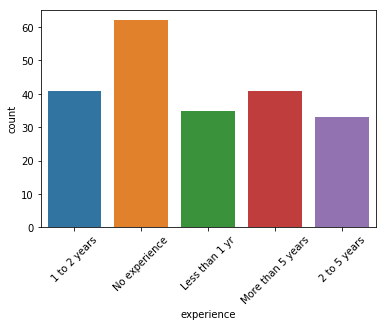

In [111]:
sns.countplot(x='experience', data=info_select1)
plt.xticks(rotation=45)

In [112]:
# Fill up miss values in experience column
info_select1.loc[:, 'experience'] = info_select1.loc[:,'experience'].fillna('not provided')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

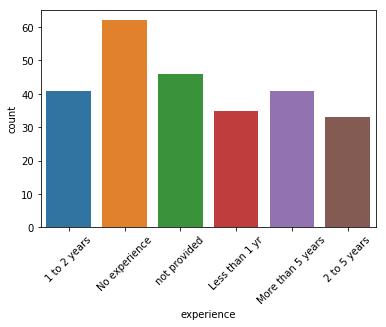

In [113]:
sns.countplot(x='experience', data=info_select1)
plt.xticks(rotation=45)

### education

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

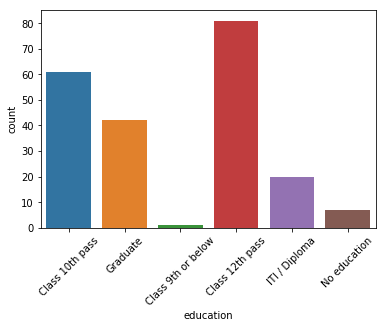

In [114]:
sns.countplot(x='education', data=info_select1)
plt.xticks(rotation=45)

In [115]:
info_select1.loc[:, 'education'] = info_select1.loc[:,'education'].fillna('not provided')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

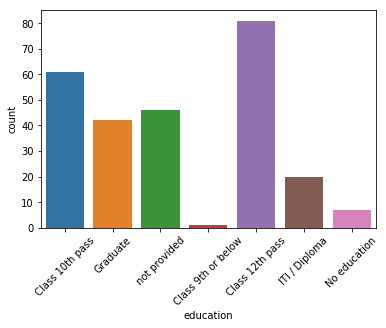

In [116]:
sns.countplot(x='education', data=info_select1)
plt.xticks(rotation=45)

### age

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

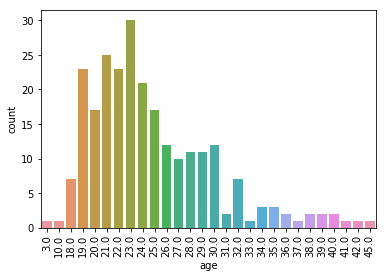

In [117]:
sns.countplot(x='age', data=info_select1)
plt.xticks(rotation=90)

In [118]:
from sklearn.preprocessing import Imputer
# change it to "from sklearn import impute.SimpleImputer" after 0.22 version

imr = Imputer(missing_values='NaN', strategy='median', axis=0)

info_select1.loc[:,'age'] = imr.fit_transform(info_select1[['age']]).ravel()

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [119]:
info_select1.loc[:,'age'].isnull().sum()

0

### bike survey

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

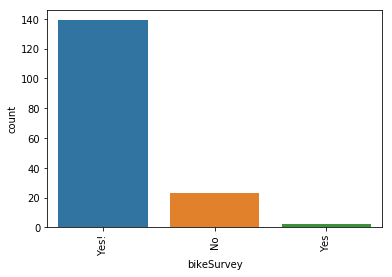

In [120]:
sns.countplot(x='bikeSurvey', data=info_select1)
plt.xticks(rotation=90)

In [121]:
info_select1.loc[:, 'bikeSurvey'] = info_select1.loc[:, 'bikeSurvey'].str.replace("!","")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

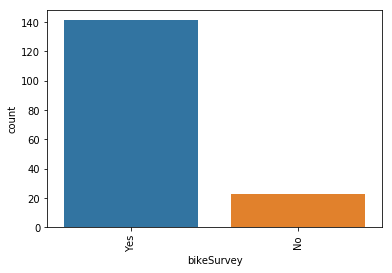

In [122]:
sns.countplot(x='bikeSurvey', data=info_select1)
plt.xticks(rotation=90)

In [123]:
info_select1.loc[:, 'bikeSurvey'] = info_select1.loc[:,'bikeSurvey'].fillna('not provided')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

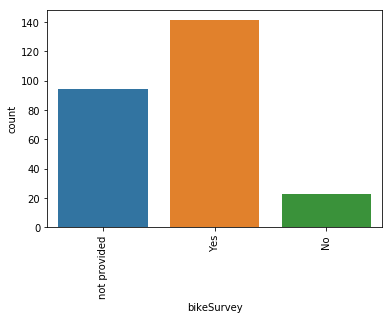

In [124]:
sns.countplot(x='bikeSurvey', data=info_select1)
plt.xticks(rotation=90)

### DL 

In [125]:
info_select1.loc[:, 'drivingLicenseSurvey'].fillna('not provided', inplace=True)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [126]:
info_select1.loc[:, 'drivingLicenseSurvey'] = info_select1.loc[:, 'drivingLicenseSurvey'].str.replace("!","")

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

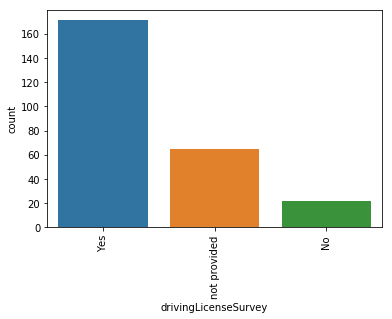

In [127]:
sns.countplot(x='drivingLicenseSurvey', data=info_select1)
plt.xticks(rotation=90)

### married

(array([0, 1]), <a list of 2 Text xticklabel objects>)

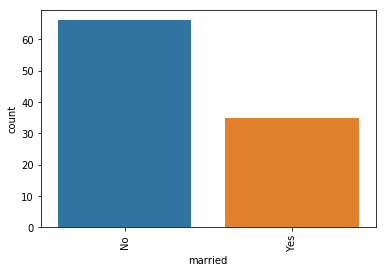

In [128]:
sns.countplot(x='married', data=info_select1)
plt.xticks(rotation=90)

In [129]:
info_select1.loc[:, 'married'].fillna('not provided', inplace=True)

### source

In [130]:
info_select1.loc[:, 'source'].fillna('not provided', inplace=True)

In [131]:
target=['API', 'WhatsApp OptIn Form', 'Referrals', 'not provided']
info_select1.loc[~(info_select1['source'].isin(target)), 'source'] = 'others'

In [132]:
info_select1.loc[:, 'source'].value_counts()

others                 89
API                    76
WhatsApp OptIn Form    53
Referrals              40
Name: source, dtype: int64

### add label

In [133]:
info_select1['label'] = 1

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### FINAL CHECKING

In [134]:
info_select1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 10 columns):
userId                  258 non-null object
experience              258 non-null object
education               258 non-null object
age                     258 non-null float64
bikeSurvey              258 non-null object
drivingLicenseSurvey    258 non-null object
married                 258 non-null object
city                    258 non-null object
source                  258 non-null object
label                   258 non-null int64
dtypes: float64(1), int64(1), object(8)
memory usage: 20.2+ KB


In [135]:
info_select1.head()

,userId,experience,education,age,bikeSurvey,drivingLicenseSurvey,married,city,source,label
0,00521bd7-def9-4d5f-a11d-3ba1259864ab,1 to 2 years,Class 10th pass,21.0,not provided,Yes,No,Ahmedabad,others,1
1,00fc4300-af04-445f-bafa-d6d2e95adedc,No experience,Graduate,20.0,not provided,not provided,No,others,Referrals,1
2,01f6e326-a296-4140-b804-28ba1f051a98,not provided,not provided,23.0,not provided,not provided,not provided,others,others,1
3,02e479af-b0c9-4692-ae4e-90a4be2de69d,not provided,not provided,30.0,Yes,Yes,not provided,others,others,1
4,0515e538-5c6a-4dd0-baed-a41628011f73,Less than 1 yr,Class 10th pass,21.0,Yes,Yes,not provided,Delhi/NCR,WhatsApp OptIn Form,1


In [55]:
# Make sure userId is unique
len(info_select1.userId.unique())

258

In [190]:
t = 0
for i in info_select1.userId.unique():
    if i in label:
        t += 1
print(t)

0


# Append User info (10534 + 258)

In [140]:
info_append = info_select.append(info_select1)

In [141]:
info_append.shape

(10792, 10)

In [143]:
info_append.label.value_counts()

0    10493
1      299
Name: label, dtype: int64

In [248]:
info_append.head()

,userId,experience,education,age,bikeSurvey,drivingLicenseSurvey,married,city,source,label
0,6ca32c09-facf-457f-8e1a-bc0e7bce71e0,1 to 2 years,Class 12th pass,25.0,Yes,Yes,not provided,Delhi/NCR,API,0
2,06db6fbf-3f7c-4296-a408-3fa336e19c9c,No experience,Class 12th pass,20.0,Yes,Yes,No,Delhi/NCR,WhatsApp OptIn Form,0
3,4a6591cc-d34e-4d8c-8601-45fd5c6a24af,2 to 5 years,Class 12th pass,24.0,Yes,Yes,No,Delhi/NCR,WhatsApp OptIn Form,0
4,f7ce747a-6d6f-4d7f-845b-7fad148d146a,Less than 1 yr,ITI / Diploma,22.0,Yes,Yes,No,Delhi/NCR,API,0
5,fc9a0f5b-e655-469d-82ad-0a0200f58e98,1 to 2 years,Class 10th pass,19.0,Yes,Yes,No,Delhi/NCR,Referrals,0


# Message (258)

In [176]:
!ls data

hiredData_forGary_20190918.csv
userInfo_258Users_withUserId.csv
userInfo_forGary_20190918.csv
userMessages_258Users_withPhoneNumber_20191004.xlsx
user_messages_forGary_20190918.csv


In [178]:
message_258 = pd.read_excel('data/userMessages_258Users_withPhoneNumber_20191004.xlsx')

In [179]:
message_258

,Interview Scheduled At,phoneNumber,id,createdAt,updatedAt,deletedAt,message,url,type,receivedAt,...,isExpectingResponse,isIgnored,isUploaded,isChatAppMessage,subType,state,isHsm,channelId,instructionId,uncompressedUrl
0,2019-03-14T16:51:50.131Z,7836909310,0f26e842-a289-444c-83ed-9a8258a5ae58,2019-03-06T04:50:00.874Z,2019-03-06T04:50:00.874Z,NaN,"Hi, I want a job. CLICK SEND.",NaN,Incoming,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-14T16:51:50.131Z,7836909310,ea1ee916-9dd5-483c-bb76-a1db2a1796af,2019-03-06T04:50:00.998Z,2019-03-06T04:50:00.998Z,NaN,Hi I am *Job Finder* 🙂! Are you looking for a ...,NaN,Outgoing,NaN,...,1.0,NaN,False,NaN,Default,NaN,NaN,NaN,NaN,NaN
2,2019-03-14T16:51:50.131Z,7836909310,e8a6cf6f-4b36-45e2-b9d5-c9c644332c38,2019-03-06T04:50:17.700Z,2019-03-06T04:50:17.700Z,NaN,Yes,NaN,Incoming,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-03-14T16:51:50.131Z,7836909310,a477f111-db19-41ea-a4fe-9c1cec51a107,2019-03-06T04:50:17.842Z,2019-03-06T04:50:17.842Z,NaN,Which language do you want to chat in?\n\n1️⃣ ...,NaN,Outgoing,NaN,...,1.0,NaN,False,NaN,Default,NaN,NaN,NaN,NaN,NaN
4,2019-03-14T16:51:50.131Z,7836909310,353ba569-7a31-4881-a772-37c3c8d57418,2019-03-06T04:50:29.391Z,2019-03-06T04:50:29.391Z,NaN,2,NaN,Incoming,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-03-14T16:51:50.131Z,7836909310,e64c8417-dc01-4e76-943c-8a54bf543eb2,2019-03-06T04:50:30.807Z,2019-03-06T04:50:30.807Z,NaN,"To receive job updates, please click and opt-i...",NaN,Outgoing,NaN,...,1.0,NaN,False,NaN,Default,NaN,NaN,NaN,NaN,NaN
6,2019-03-14T16:51:50.131Z,7836909310,aafe5654-9f55-435f-9e84-69b55c04ddab,2019-03-06T04:50:45.496Z,2019-03-06T04:50:45.496Z,NaN,कृपया मुझे अपने बारे में और अधिक बताएं ताकि मै...,NaN,Outgoing,NaN,...,0.0,NaN,False,NaN,Default,NaN,NaN,NaN,NaN,NaN
7,2019-03-14T16:51:50.131Z,7836909310,2dde0e2e-52e0-499b-8ad1-313dd8dd28d7,2019-03-06T04:50:45.625Z,2019-03-06T04:50:45.625Z,NaN,आपका *name* क्‍या है?,NaN,Outgoing,NaN,...,1.0,NaN,False,NaN,Default,NaN,NaN,NaN,NaN,NaN
8,2019-03-14T16:51:50.131Z,7836909310,16b709e3-9bea-4ee6-81b9-f439196ff149,2019-03-06T04:51:07.155Z,2019-03-06T04:51:07.155Z,NaN,Sumit Rai,NaN,Incoming,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-03-14T16:51:50.131Z,7836909310,a6255092-ad88-48a2-a545-6f72ef8ea4f9,2019-03-06T04:51:07.322Z,2019-03-06T04:51:07.322Z,NaN,आपसे Sumit मिलकर अच्‍छा लगा! 👋,NaN,Outgoing,NaN,...,0.0,NaN,False,NaN,Default,NaN,NaN,NaN,NaN,NaN


In [180]:
len(message_258.userId)

10320

In [181]:
df = message_258.copy()

In [182]:
# remove unnecessary columns
df = df[['createdAt', 'message', 'type', 'userId']]

In [183]:
df.shape

(10320, 4)

In [184]:
df = df[df['userId'].isin(info_select1.userId.unique())]

In [185]:
# message_258 table only has 120 userId found in info_258 table
len(df.userId.unique())

120

In [187]:
df.head()

,createdAt,message,type,userId
0,2019-03-06T04:50:00.874Z,"Hi, I want a job. CLICK SEND.",Incoming,7b32dfcd-66f2-43b4-a155-9c7873c8cd94
1,2019-03-06T04:50:00.998Z,Hi I am *Job Finder* 🙂! Are you looking for a ...,Outgoing,7b32dfcd-66f2-43b4-a155-9c7873c8cd94
2,2019-03-06T04:50:17.700Z,Yes,Incoming,7b32dfcd-66f2-43b4-a155-9c7873c8cd94
3,2019-03-06T04:50:17.842Z,Which language do you want to chat in?\n\n1️⃣ ...,Outgoing,7b32dfcd-66f2-43b4-a155-9c7873c8cd94
4,2019-03-06T04:50:29.391Z,2,Incoming,7b32dfcd-66f2-43b4-a155-9c7873c8cd94


### count the amount of outgoing, incoming, or both

In [188]:
df_count = df.groupby('userId').agg('count')

In [191]:
# Create a dic with userId and message count pairs
message_count = {}
for i in df_count.index:
    message_count[i] = df_count.loc[i, 'message']

In [192]:
message_count

{'02e479af-b0c9-4692-ae4e-90a4be2de69d': 42,
 '05185aef-7ebd-4aea-b52b-0e594e54b79d': 104,
 '0c590a19-53df-46ae-9371-7e0f408c7203': 60,
 '0e578a28-588f-4447-a0ff-c286fff0f547': 78,
 '101c754b-54d3-484c-ac1c-f293162006c9': 117,
 '167f9527-801c-4a2b-8b9c-4fda270a2ec2': 85,
 '17267816-814e-467f-a246-6f3acaef6ed6': 58,
 '19d0cd8e-18da-4c45-b8dd-c1ea8d5bf085': 88,
 '1e8f85a9-70f2-4e65-a44e-f584297ccd17': 167,
 '2087c24d-5b23-4d87-85c5-82636b0bcb51': 70,
 '226813cf-01fa-4a15-be6b-e8e84a06766d': 86,
 '28330abb-03b5-4db7-8242-1a790f0df2bb': 85,
 '2ab15ff1-cb82-42a7-bb98-19ba76684b8b': 300,
 '2f0103c9-cc78-40aa-af34-be0613e97e9e': 169,
 '2f863924-d9a9-4eae-bcf2-ca12606b5f47': 80,
 '2fce42e9-2343-4707-ac19-f6fda8050d5b': 56,
 '30fece2e-1da6-4478-9482-87a12be15f55': 76,
 '314eec6c-98da-42e0-b6f3-438dec392dd5': 44,
 '35d42fb3-476f-486d-86dd-fafe392e3d41': 43,
 '3ac7d8a8-f379-4590-815c-2fe8de076ca4': 47,
 '3cd18d06-3048-4116-a58b-b2a3d9e31894': 46,
 '3d6f9105-088f-49bc-ad99-eefe13f38520': 39,
 '3d8

In [193]:
df_outgoing = df[df['type']=='Outgoing']
df_outgoing = df_outgoing.groupby('userId').agg('count')

In [194]:
df_outgoing_count={}
for i in df_outgoing.index:
    df_outgoing_count[i] = df_outgoing.loc[i, 'message']

In [195]:
df_incoming = df[df['type']=='Incoming']
df_incoming = df_incoming.groupby('userId').agg('count')

In [196]:
df_incoming_count={}
for i in df_incoming.index:
    df_incoming_count[i] = df_incoming.loc[i, 'message']

### total_time of conversation

In [197]:
df['createdAt'] = pd.to_datetime(df['createdAt'])

In [199]:
temp = df[['userId', 'createdAt']]

In [200]:
temp_dif = temp.groupby('userId').agg(['max', 'min'])

In [201]:
temp_dif['dif'] = temp_dif['createdAt']['max'] - temp_dif['createdAt']['min']

In [202]:
# id and total time pair
id_dif ={}
for i in range(len(temp_dif)):
    id_dif[temp_dif.index[i]] = temp_dif.iloc[i, 2]

In [203]:
id_dif

{'02e479af-b0c9-4692-ae4e-90a4be2de69d': Timedelta('39 days 06:40:46.322000'),
 '05185aef-7ebd-4aea-b52b-0e594e54b79d': Timedelta('65 days 23:10:38.842000'),
 '0c590a19-53df-46ae-9371-7e0f408c7203': Timedelta('7 days 12:39:11.925000'),
 '0e578a28-588f-4447-a0ff-c286fff0f547': Timedelta('33 days 16:40:57.266000'),
 '101c754b-54d3-484c-ac1c-f293162006c9': Timedelta('49 days 23:54:38.309000'),
 '167f9527-801c-4a2b-8b9c-4fda270a2ec2': Timedelta('53 days 14:20:38.623000'),
 '17267816-814e-467f-a246-6f3acaef6ed6': Timedelta('2 days 09:42:36.877000'),
 '19d0cd8e-18da-4c45-b8dd-c1ea8d5bf085': Timedelta('54 days 18:01:33.256000'),
 '1e8f85a9-70f2-4e65-a44e-f584297ccd17': Timedelta('81 days 18:02:20.596000'),
 '2087c24d-5b23-4d87-85c5-82636b0bcb51': Timedelta('1 days 01:05:51.768000'),
 '226813cf-01fa-4a15-be6b-e8e84a06766d': Timedelta('53 days 13:16:53.411000'),
 '28330abb-03b5-4db7-8242-1a790f0df2bb': Timedelta('18 days 14:13:13.674000'),
 '2ab15ff1-cb82-42a7-bb98-19ba76684b8b': Timedelta('124

### responding time

In [204]:
df_respond = df.groupby('userId').apply(lambda x: x.sort_values('createdAt')).reset_index(drop=True)

In [205]:
import statistics

In [210]:
def respond_mean(dataframe):
    temp=[]
    newstart = 0
    for j in range(newstart, len(dataframe)):
        if dataframe.loc[j, 'type'] == 'Outgoing':
            out_time = dataframe.loc[j, 'createdAt']
            
            for t in range(j, len(dataframe)):
                if dataframe.loc[t, 'type'] == 'Incoming':
                    in_time = dataframe.loc[t, 'createdAt']
                    responding = in_time - out_time
                    temp.append(responding.total_seconds())
                    newstart = t
                    break
    
    return statistics.mean(temp)


In [211]:
df_respond_pair = df_respond.groupby('userId').apply(lambda x: respond_mean(x.reset_index()))

In [212]:
df_respond_pair

userId
02e479af-b0c9-4692-ae4e-90a4be2de69d    249937.910679
05185aef-7ebd-4aea-b52b-0e594e54b79d    237036.191556
0c590a19-53df-46ae-9371-7e0f408c7203     45434.906265
0e578a28-588f-4447-a0ff-c286fff0f547     92496.927833
101c754b-54d3-484c-ac1c-f293162006c9     51096.882079
167f9527-801c-4a2b-8b9c-4fda270a2ec2    151464.892623
17267816-814e-467f-a246-6f3acaef6ed6      4247.413229
19d0cd8e-18da-4c45-b8dd-c1ea8d5bf085    144639.563564
1e8f85a9-70f2-4e65-a44e-f584297ccd17    164831.724935
2087c24d-5b23-4d87-85c5-82636b0bcb51      4642.893026
226813cf-01fa-4a15-be6b-e8e84a06766d    196996.401717
28330abb-03b5-4db7-8242-1a790f0df2bb     53943.994583
2ab15ff1-cb82-42a7-bb98-19ba76684b8b    124064.644790
2f0103c9-cc78-40aa-af34-be0613e97e9e     33339.626495
2f863924-d9a9-4eae-bcf2-ca12606b5f47     93218.845373
2fce42e9-2343-4707-ac19-f6fda8050d5b     46676.637000
30fece2e-1da6-4478-9482-87a12be15f55    820137.558432
314eec6c-98da-42e0-b6f3-438dec392dd5        12.194182
35d42fb3-476f-486d-86

In [231]:
# transform 'Series' into dictionary pair
respond_pair = {}
for i in range(len(df_respond_pair)):
    respond_pair[df_respond_pair.index[i]] = df_respond_pair[i]
    

In [213]:
def respond_median(dataframe):
    temp=[]
    newstart = 0
    for j in range(newstart, len(dataframe)):
        if dataframe.loc[j, 'type'] == 'Outgoing':
            out_time = dataframe.loc[j, 'createdAt']
            
            for t in range(j, len(dataframe)):
                if dataframe.loc[t, 'type'] == 'Incoming':
                    in_time = dataframe.loc[t, 'createdAt']
                    responding = in_time - out_time
                    temp.append(responding.total_seconds())
                    newstart = t
                    break
    
    return statistics.median(temp)


In [214]:
df_respond_median_pair = df_respond.groupby('userId').apply(lambda x: respond_median(x.reset_index()))

In [215]:
# transform 'Series' into dictionary pair
respond_median_pair = {}
for i in range(len(df_respond_median_pair)):
    respond_median_pair[df_respond_median_pair.index[i]] = df_respond_median_pair[i]
    

### merge message_258's features

In [216]:
prelim = pd.DataFrame()


In [217]:
prelim['userid'] = df.userId.unique()

In [245]:
prelim['hired'] = 2

In [221]:
prelim['time_whole_conversation'] = prelim['userid'].map(id_dif)

In [222]:
prelim['time_whole_conversation(hour)']=0

In [224]:
for i in range(len(prelim)):
    prelim.loc[i,'time_whole_conversation(hour)'] = int(prelim.loc[i, 'time_whole_conversation'].total_seconds() / 3600)
                                                        

In [225]:
# drop datetime object
prelim.drop('time_whole_conversation', axis=1, inplace=True)

Text(0.5, 1.0, 'Time of total conversation (hour)')

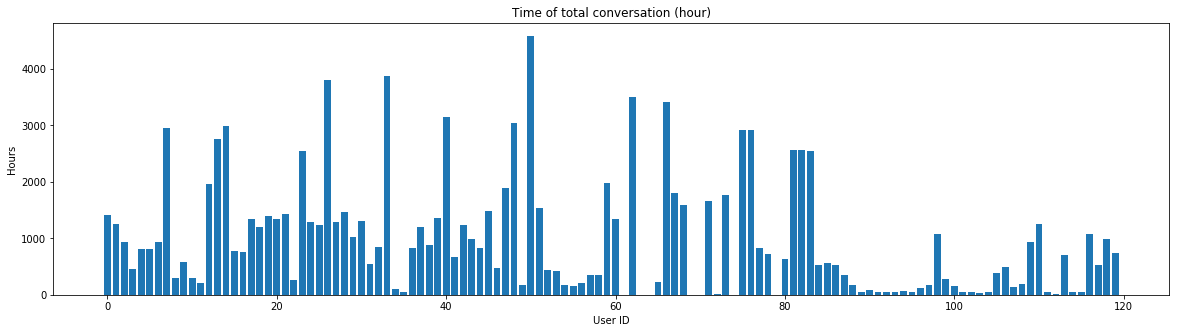

In [227]:
plt.figure(figsize=(20,5))
plt.bar(x=range(len(prelim)), height=prelim['time_whole_conversation(hour)'])
plt.ylabel('Hours')
plt.xlabel('User ID')
plt.title('Time of total conversation (hour)')


In [228]:
prelim['total_message_count'] = prelim['userid'].map(message_count)
prelim['incoming_count'] = prelim['userid'].map(df_incoming_count)
prelim['outgoing_count'] = prelim['userid'].map(df_outgoing_count)

In [232]:
prelim['responding'] = prelim['userid'].map(respond_pair)
prelim['responding_median'] = prelim['userid'].map(respond_median_pair)

In [233]:
prelim.head()

,userid,hired,time_whole_conversation(hour),total_message_count,incoming_count,outgoing_count,responding,responding_median
0,7b32dfcd-66f2-43b4-a155-9c7873c8cd94,1,1418,129,46,83,65829.774833,46.390
1,7cb67e62-3e47-4fac-a3be-8b7222bc37ae,1,1255,146,51,95,88029.449223,32.740
2,46b5af5a-8f7b-42e0-88ac-ee7ff9ee6f05,1,927,100,43,57,59727.848839,47.487
3,3ac7d8a8-f379-4590-815c-2fe8de076ca4,1,451,47,17,30,173787.831517,49.723
4,7f450f46-a8eb-4bf7-8d92-8c5fda4ca932,1,810,62,24,38,55711.452176,18.500


In [236]:
prelim.shape

(120, 8)

# Append message (10534 + 120)

In [240]:
prelim_original = pd.read_csv('prelim.csv')
prelim_original.drop('Unnamed: 0', axis=1, inplace=True)

In [241]:
prelim_original.shape

(10534, 8)

In [242]:
prelim_original.head()

,userid,hired,time_whole_conversation(hour),total_message_count,incoming_count,outgoing_count,responding,responding_median
0,6ca32c09-facf-457f-8e1a-bc0e7bce71e0,0,4238,149,57,92,4.504703e+05,34.3415
1,06db6fbf-3f7c-4296-a408-3fa336e19c9c,0,2746,156,58,98,3.035038e+05,25.9330
2,4a6591cc-d34e-4d8c-8601-45fd5c6a24af,0,3722,92,33,59,3.426029e+05,16.8930
3,f7ce747a-6d6f-4d7f-845b-7fad148d146a,0,3617,97,35,62,9.442864e+05,20.0390
4,fc9a0f5b-e655-469d-82ad-0a0200f58e98,0,2689,83,30,53,1.033980e+06,11.8200


In [246]:
message_append = prelim_original.append(prelim)

In [247]:
message_append.shape

(10654, 8)

# Merge append_info and append_message

In [252]:
merge = pd.merge(info_append, message_append, left_on='userId', right_on='userid')

In [255]:
merge.drop('label', axis=1, inplace=True)

In [259]:
merge.hired.value_counts()

0    10493
2      120
1       41
Name: hired, dtype: int64

In [262]:
merge.to_csv('merge_with_120')

# Prepare data for PCA

In [260]:
X = merge.drop('hired', axis=1)
y = merge['hired']

In [ ]:
X.drop(['total_message_count', 'outgoing_count'], axis=1, inplace=True)

In [264]:
df_cluster = merge.copy()

In [265]:
df_cluster.drop(['total_message_count', 'outgoing_count'], axis=1, inplace=True)

In [266]:
# Outliers
df_cluster = df_cluster[(df_cluster['responding_median']<500) & (df_cluster['responding']<200000) & (df_cluster['time_whole_conversation(hour)']<1000)]


In [268]:
def box_dist_plot(dataframe, column):
    plt.subplot(1,2,1)
    dataframe.boxplot(column)
    
    plt.subplot(1,2,2)
    sns.distplot(dataframe[column])
    
    plt.tight_layout()

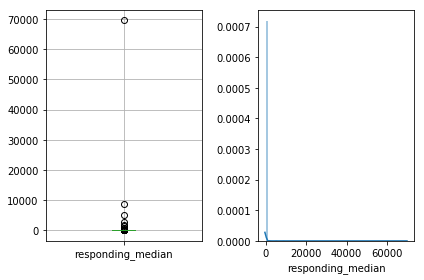

In [271]:
# Before
box_dist_plot(merge,'responding_median')


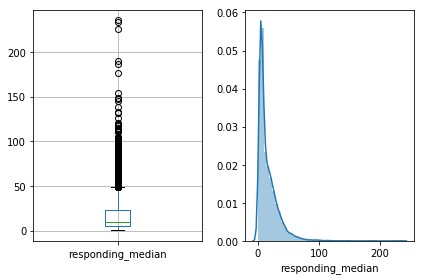

In [272]:
# After
box_dist_plot(df_cluster,'responding_median')

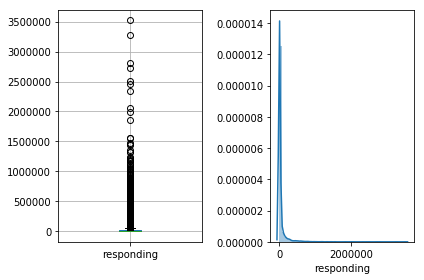

In [273]:
# Before
box_dist_plot(merge,'responding')

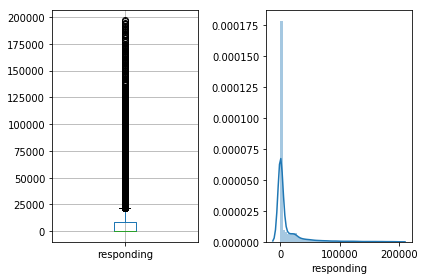

In [274]:
# After
box_dist_plot(df_cluster,'responding')

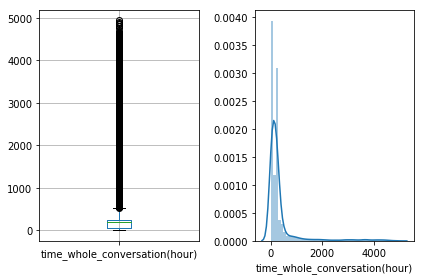

In [276]:
# Before
box_dist_plot(merge,'time_whole_conversation(hour)')

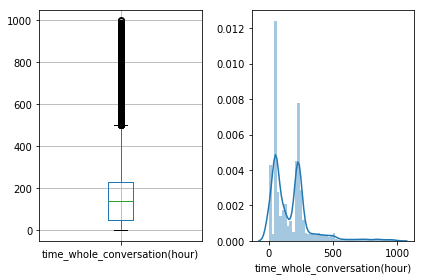

In [277]:
# After
box_dist_plot(df_cluster,'time_whole_conversation(hour)')

In [279]:
X = df_cluster.drop('hired', axis=1)
y = df_cluster['hired']

In [281]:
y.value_counts()

0    9655
2      69
1      39
Name: hired, dtype: int64

In [290]:
X.drop(['userId', 'userid'], axis=1, inplace=True)

In [292]:
X = pd.get_dummies(X, drop_first=True)

In [283]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [294]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [296]:
X_std

array([[-0.50094258,  4.06394934,  1.89305482, ..., -0.08498062,
        -0.01753217, -0.65371185],
       [-0.2303094 ,  4.55569475,  2.86939897, ..., -0.08498062,
        -0.01753217, -0.65371185],
       [ 2.02496708,  4.78927383,  1.96815822, ..., -0.08498062,
        -0.01753217, -0.65371185],
       ...,
       [-0.95199787,  2.99440306,  1.14202087, ..., -0.08498062,
        -0.01753217,  1.52972598],
       [ 0.04032378, -0.73056845, -0.58535724, ..., -0.08498062,
        -0.01753217,  1.52972598],
       [ 0.13053484,  3.26486304,  0.16567672, ..., -0.08498062,
        -0.01753217,  1.52972598]])

# PCA

In [307]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E', 'r']
    markers = ['o', 's', '^']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')

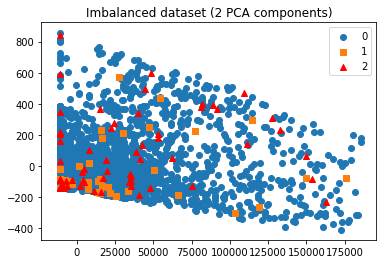

In [308]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')


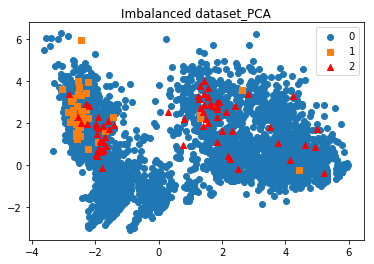

In [309]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plot_2d_space(X_pca, y, 'Imbalanced dataset_PCA')
plt.savefig('Imbalanced dataset_std_PCA.png')


# Remove age < 18 then PCA

In [314]:
# check < 18 years
df_cluster[(df_cluster['age']<18)]['hired'].value_counts()

0    179
2      1
1      1
Name: hired, dtype: int64

In [315]:
# remove < 18 years
df_cluster_age = df_cluster.loc[~(df_cluster['age']<18),:]

In [318]:
X_age = df_cluster_age.drop('hired', axis=1)
y_age = df_cluster_age['hired']

In [320]:
X_age.drop(['userId', 'userid'], axis=1, inplace=True)

In [321]:
X_age = pd.get_dummies(X_age, drop_first=True)

In [322]:
sc = StandardScaler()
sc.fit(X_age)
X_age_std = sc.transform(X_age)

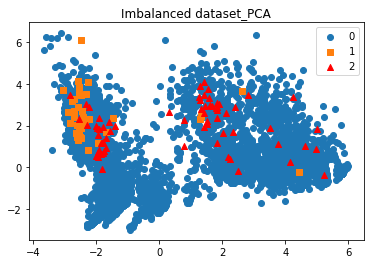

In [323]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_age_std)

plot_2d_space(X_pca, y_age, 'Imbalanced dataset_PCA')
plt.savefig('Imbalanced dataset_std_PCA.png')